## 1. Visualize Data Availability Over Time

This first step connects to our local DuckDB database and queries the `prices_with_market_cap` table to see how many individual stock prices we have for each trading day throughout history. 

Plotting this helps us understand the depth and breadth of the dataset over time. We can see the impact of historical events, market growth, and any potential data gaps. This is a crucial first step before we attempt to construct any kind of market index.


### Price Availbility by Day

--- Successfully connected to the database. ---
Running query to get daily symbol counts...
Query complete.
Generating plot...


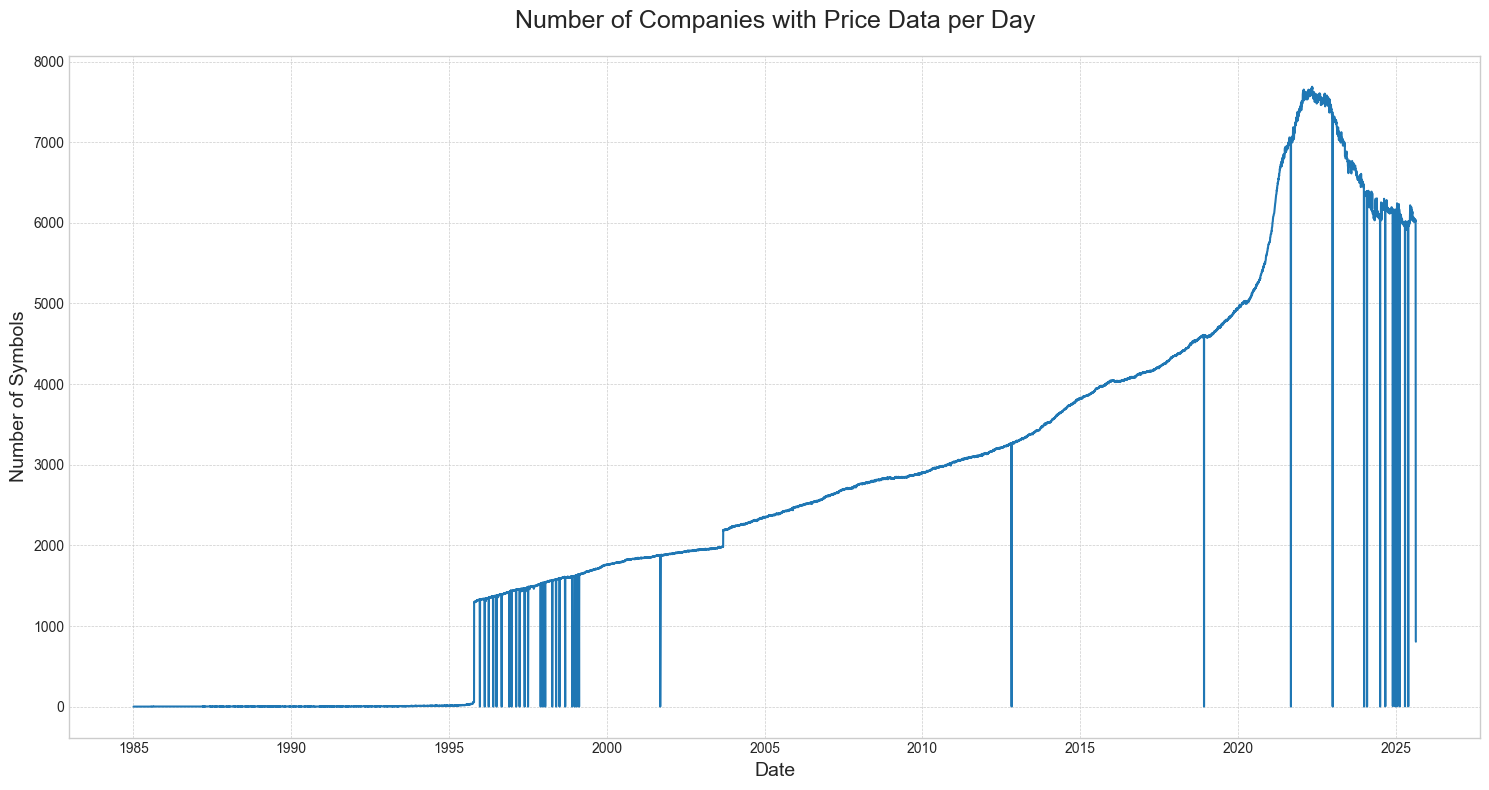

In [ ]:
import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
DB_FILE = 'financial_data.duckdb'

# --- Main Script ---
if not os.path.exists(DB_FILE):
    print(f"Database file not found at '{DB_FILE}'. Please run the 'Create Local Database' notebook first.")
else:
    # Connect to the database
    con = duckdb.connect(database=DB_FILE, read_only=True)
    
    print("--- Successfully connected to the database. ---")
    
    # Query to count the number of symbols with price/market cap data per day
    query = """
    SELECT
        CAST(date AS DATE) AS trade_date,
        COUNT(symbol) AS symbol_count
    FROM prices_with_market_cap
    --where year(date) > 2022
    GROUP BY trade_date
    ORDER BY trade_date;
    """
    
    print("Running query to get daily symbol counts...")
    daily_counts_df = con.execute(query).df()
    print("Query complete.")
    
    # Close the database connection
    con.close()
    
    if daily_counts_df.empty:
        print("No data was returned from the query. Cannot generate plot.")
    else:
        # --- Plotting ---
        print("Generating plot...")
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax = plt.subplots(figsize=(15, 8))

        # Create the line plot
        sns.lineplot(
            data=daily_counts_df, 
            x='trade_date', 
            y='symbol_count', 
            ax=ax
        )

        # Formatting
        ax.set_title('Number of Companies with Price Data per Day', fontsize=18, pad=20)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Number of Symbols', fontsize=14)
        #ax.set_yscale('log') # Use a log scale to better visualize changes in earlier years
        
        # Add a grid and improve layout
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        
        # Show the plot
        plt.show()


### Statement Availability by Day

--- Successfully connected to the database. ---
Running query to get daily symbol counts...
Query complete.
Generating plot...


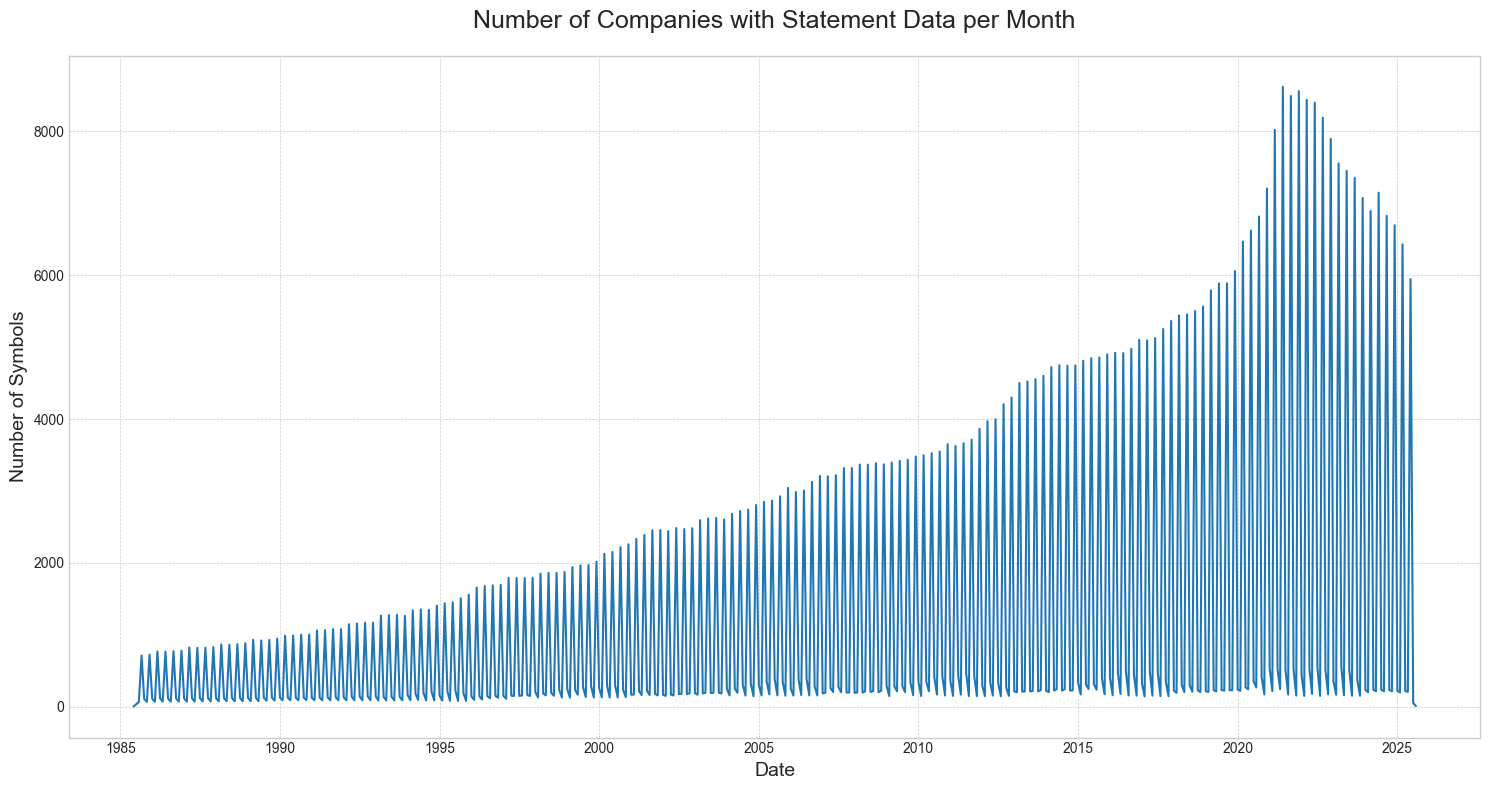

In [20]:
import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
DB_FILE = 'financial_data.duckdb'

# --- Main Script ---
if not os.path.exists(DB_FILE):
    print(f"Database file not found at '{DB_FILE}'. Please run the 'Create Local Database' notebook first.")
else:
    # Connect to the database
    con = duckdb.connect(database=DB_FILE, read_only=True)
    
    print("--- Successfully connected to the database. ---")
    
    # Query to count the number of symbols with price/market cap data per day
    query = """
    SELECT
       DATE_trunc('month', exactDate) as trade_date
        ,COUNT(symbol) AS symbol_count
    FROM statements
    where year(exactDate) > 1984
    GROUP BY trade_date
    ORDER BY trade_date;
    """
    
    print("Running query to get daily symbol counts...")
    daily_counts_df = con.execute(query).df()
    print("Query complete.")
    
    # Close the database connection
    con.close()
    
    if daily_counts_df.empty:
        print("No data was returned from the query. Cannot generate plot.")
    else:
        # --- Plotting ---
        print("Generating plot...")
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, ax = plt.subplots(figsize=(15, 8))

        # Create the line plot
        sns.lineplot(
            data=daily_counts_df, 
            x='trade_date', 
            y='symbol_count', 
            ax=ax
        )

        # Formatting
        ax.set_title('Number of Companies with Statement Data per Month', fontsize=18, pad=20)
        ax.set_xlabel('Date', fontsize=14)
        ax.set_ylabel('Number of Symbols', fontsize=14)
        #ax.set_yscale('log') # Use a log scale to better visualize changes in earlier years
        
        # Add a grid and improve layout
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        
        # Show the plot
        plt.show()
